In [1]:
import sys
sys.path.append('prov')
import dataloader as dl
import datatransformer as dt
import datasaver as ds
import dataplotter as dp
import provmagic
import numpy as np

In [2]:
csv_content = dl.read_csv('CDODiv2177686828992.txt', delimiter=' ') # load data

In [3]:
dd = csv_content[['YearMonth','HDD','CDD']] # project

In [4]:
dd.loc[:,'Year'] = dd['YearMonth']//100

D:\Programs\Anaconda\lib\site-packages\pandas\core\indexing.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Programs\Anaconda\lib\site-packages\pandas\core\indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
del dd['YearMonth']

In [6]:
dd_year = dt.group_aggregate(dd, 'Year', np.sum)

In [7]:
cdd_avg = dt.average(dd_year['CDD'][0:31])
hdd_avg = dt.average(dd_year['HDD'][0:31])
dd_year.loc[:, 'HDD'] = dd_year['HDD']/hdd_avg*100-100
dd_year.loc[:, 'CDD'] = dd_year['CDD']/cdd_avg*100-100

In [8]:
ds.write_csv(dd_year, 'dd_year.csv')

In [9]:
fig = dp.plot(dd_year, kind='bar', figsize=(20,10))

Populating the interactive namespace from numpy and matplotlib


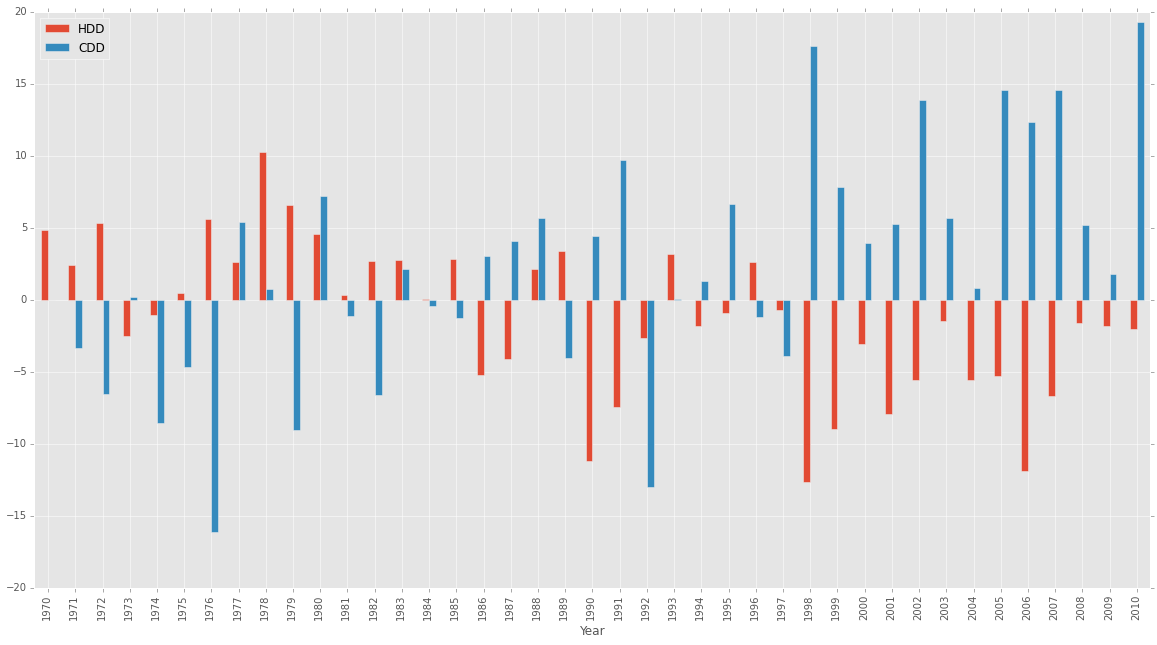

In [10]:
%pylab inline
fig

In [11]:
fig.savefig('dd_year.png')